## Import libraries

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

### Load Datasets

In [42]:
Train_data= pd.read_csv(r"C:\Users\Yuvraj Bhavsar\OneDrive\Desktop\spaceship-titanic\train.csv")
Test_data = pd.read_csv(r"C:\Users\Yuvraj Bhavsar\OneDrive\Desktop\spaceship-titanic\test.csv")

In [43]:
Train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [44]:
Test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [45]:
print(Train_data.shape)
print(Test_data.shape)

(8693, 14)
(4277, 13)


In [46]:
Train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [47]:
Test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

### Data Cleaning

In [48]:
categorical_columns = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
for col in categorical_columns:
    # Fill missing values in categorical columns with the mode of the respective dataset
    Train_data[col] = Train_data[col].fillna(Train_data[col].mode()[0])
    Test_data[col] = Test_data[col].fillna(Test_data[col].mode()[0])

numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in numerical_columns:
    # Fill missing values in numerical columns with the median of the respective dataset
    Train_data[col] = Train_data[col].fillna(Train_data[col].median())
    Test_data[col] = Test_data[col].fillna(Test_data[col].median())


C:\Users\Yuvraj Bhavsar\AppData\Local\Temp\ipykernel_62028\3834201522.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Train_data[col] = Train_data[col].fillna(Train_data[col].mode()[0])
C:\Users\Yuvraj Bhavsar\AppData\Local\Temp\ipykernel_62028\3834201522.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Test_data[col] = Test_data[col].fillna(Test_data[col].mode()[0])


In [49]:
Train_data = Train_data.drop(columns=['Name','PassengerId'], axis=1)

In [50]:
Train_data.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [51]:
Test_data = Test_data.drop(columns=['Name'], axis=1)

In [52]:
Test_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [53]:
df = Train_data

In [54]:
Train_data['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [55]:
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
Test_data[['Deck', 'Num', 'Side']] = Test_data['Cabin'].str.split('/', expand=True)

In [56]:
df = df.drop(columns=['Cabin'])
Test_data = Test_data.drop(columns=['Cabin'])

### Encoding

In [57]:
from sklearn.preprocessing import LabelEncoder

label_columns = ['HomePlanet', 'Deck', 'Side', 'CryoSleep', 'Destination', 'VIP']
label_encoders = {}

for col in label_columns:
    le = LabelEncoder()
    
    # Fit on Train and transform both Train and Test
    df[col] = le.fit_transform(df[col].astype(str))
    
    # Store the LabelEncoder instance
    label_encoders[col] = le


In [58]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,5,0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,5,1,1


### MODEL

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x = df.drop(columns=['Transported'])
y = df['Transported']

In [61]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [62]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [63]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [64]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(6954, 13)
(6954,)
(1739, 13)
(1739,)


In [65]:
x_test = Test_data

In [66]:
print(x_test.shape)

(4277, 14)


In [67]:
from tensorflow.keras.layers import Flatten, Dense

In [68]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3), 
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'), 
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.7409 - loss: 0.5270 - val_accuracy: 0.7861 - val_loss: 0.4505
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7910 - loss: 0.4443 - val_accuracy: 0.7930 - val_loss: 0.4409
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8026 - loss: 0.4234 - val_accuracy: 0.7907 - val_loss: 0.4311
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8014 - loss: 0.4218 - val_accuracy: 0.7913 - val_loss: 0.4356
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8031 - loss: 0.4175 - val_accuracy: 0.7918 - val_loss: 0.4395
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8040 - loss: 0.4206 - val_accuracy: 0.7855 - val_loss: 0.4294
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7975 - loss: 0.4189 - val_accuracy: 0.7832 - val_loss: 0.4292
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8183 - loss: 0.3999 - val_accurac

### Steps in `model.evaluate`:

1. **Input Predictions**:  
   The model takes `x_val` (input features of the validation dataset) as input and predicts output values.

2. **Comparison**:  
   The predicted outputs are compared with the true labels (`y_val`) using the loss function defined during the `compile()` step.

3. **Metric Calculation**:  
   Additional metrics (e.g., accuracy, precision) are calculated based on the predicted and true values.

4. **Output**:  
   The method returns the computed **loss** and specified **metrics** for the validation dataset.


In [69]:
model.evaluate(x_val,y_val)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7735 - loss: 0.4363


[0.41759559512138367, 0.7935594916343689]

In [70]:
y_pred = model.predict(x_val)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [71]:
y_pred = (np.array(y_pred) > 0.5).astype(int)

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

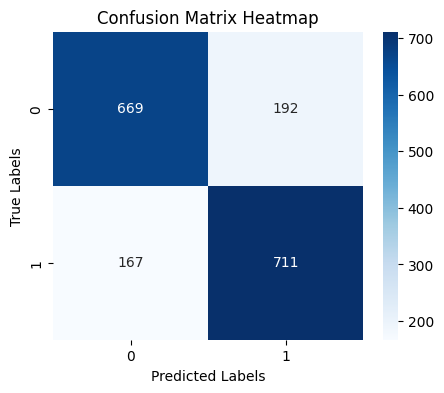

In [75]:
conf_mat = tf.math.confusion_matrix(labels = y_val,predictions = y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()